In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models, utils
import numpy as np
import operator

In [2]:
# Create list of all targets (minus background noise)

dataset_path = 'C:\\Users\\Greg\\ML\\Technical\\project\\git2\\monophonic_classfication_cnn\\padded'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
all_targets.remove('_background_noise_')
train_target = ['A3', 'A#3', 'B3', 'C4', 'C#4','D4', 'D#4', 'E4', 'F4', 'F#4','G4','A4']
print(all_targets)
numclasses = len(train_target)
print(numclasses)


['A#3', 'A#4', 'A3', 'A4', 'B3', 'B4', 'C#3', 'C#4', 'C3', 'C4', 'D#3', 'D#4', 'D3', 'D4', 'E3', 'E4', 'F#3', 'F#4', 'F3', 'F4', 'G3', 'G4']
12


In [3]:
# Settings
feature_sets_path = 'C:\\Users\\Greg\\ML\\Technical\\project\\git2\\monophonic_classfication_cnn\\audioScripts'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = 'AudioModel.h5'


In [4]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [6]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(604, 16, 16)
(75, 16, 16)
(75, 16, 16)


In [7]:
# Peek at labels
print(y_val)

[ 6.  3.  8.  9.  6.  1.  9.  0.  7.  4. 11.  5. 11. 11.  5.  1. 11.  5.
  4.  5.  1.  6.  1.  8.  6. 11.  8.  5. 10.  6.  4.  3.  4.  0.  7.  2.
  9.  2. 11.  7.  1.  2.  4.  9.  7.  7.  8.  1.  6.  1.  3.  1.  2. 10.
  9.  8.  5. 11.  1.  6.  2. 10. 11.  5.  0.  3.  1. 10. 11.  6.  5.  1.
 10.  7.  2.]


In [8]:
# Convert ground truth arrays to one wake word (1) and 'other' (0)
#ytr = []
#yv = []
#yts = []
#count = 1
#for pitch in all_targets:
#    pitch_index = all_targets.index(pitch)
#    ytr.append(np.equal(y_train, pitch_index).astype('float64'))
#    yv.append( np.equal(y_val, pitch_index).astype('float64'))
#    yts.append(np.equal(y_test, pitch_index).astype('float64'))
    #count = count + 1


In [9]:
# Peek at labels after conversion
print(y_train)

[ 6.  2.  8.  4. 10.  7.  1.  7. 10.  3.  3.  7.  6.  9.  0.  3. 10. 11.
  2.  0.  8.  0.  5.  1.  0.  2.  7.  7.  9.  3.  7.  1.  6.  1.  5.  2.
  6.  7.  2.  9.  9.  5.  8.  0.  7. 11.  9.  8.  7.  9.  6.  1.  8.  3.
  1.  2.  8.  2.  8.  4.  1.  8.  6.  8.  7. 10.  0.  9.  9.  8.  4.  2.
  7. 10.  6.  6. 11. 11.  6.  3. 10.  9. 10.  4.  6.  2.  1.  9.  6.  6.
  5.  3.  0.  9. 11.  1. 10.  5.  9.  2.  8.  3.  5.  4.  7.  6.  3.  6.
  8.  0.  5.  9.  2. 10.  1.  1.  7.  0.  4. 11.  5.  5.  6.  0.  9.  4.
  2.  1.  2.  2.  5.  2.  4.  5.  3.  2. 10.  4.  7.  3.  4.  6.  7.  5.
  0.  1.  0.  2.  0.  3. 10. 10.  9.  3.  3.  0.  8.  4. 10. 11.  1. 11.
  2.  7.  6.  8. 10.  4.  0.  4.  8.  3.  4.  3.  5.  5. 11.  8.  9.  8.
  6.  4. 11.  7.  7.  1.  4.  3.  4.  5.  1.  0. 10.  7.  8. 10.  5.  2.
 11.  3.  4.  7.  8.  7.  5.  3.  5. 10.  3.  4.  3.  3.  5.  2.  3.  8.
  6.  6.  8.  4.  0.  0.  3.  8.  6.  8.  1.  2.  4.  2.  7.  3.  1.  3.
  0.  6.  5.  8.  9.  1.  2.  5.  3.  9.  3. 11.  8

In [10]:
# What percentage of 'stop' appear in validation labels
#print(sum(y_val) / len(y_val))
#print(1 - sum(y_val) / len(y_val))

In [11]:
# View the dimensions of our input data
#print(x_train.shape)

In [12]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

#y_train = utils.to_categorical(y_train, numclasses)
#y_test = utils.to_categorical(y_test, numclasses)
#y_val = utils.to_categorical(y_val, numclasses)

#fig=plt.figure()
#plt.imshow(x_val[11], cmap='inferno', origin='lower')

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(604, 16, 16, 1)
(75, 16, 16, 1)
(75, 16, 16, 1)


In [13]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 16, 1)


In [14]:
# Build model
model = models.Sequential()
model.add(layers.Conv2D(32, 2, activation='relu',input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(numclasses, activation="softmax"))

In [15]:
# Display model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 64)                1

In [16]:
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

In [17]:
# Train
#pitch_index = all_targets.index(pitch)
history = model.fit(x_train, 
                    y_train, 
                    epochs=100, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Epoch 1/100
7/7 [==============================] - 1s 55ms/step - loss: 2.3363 - acc: 0.3079 - val_loss: 1.8325 - val_acc: 0.4000
Epoch 2/100
7/7 [==============================] - 0s 18ms/step - loss: 1.4792 - acc: 0.5497 - val_loss: 1.0874 - val_acc: 0.7867
Epoch 3/100
7/7 [==============================] - 0s 18ms/step - loss: 0.8572 - acc: 0.8858 - val_loss: 0.6306 - val_acc: 0.9200
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.4384 - acc: 0.9735 - val_loss: 0.3329 - val_acc: 0.9600
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 0.2324 - acc: 0.9785 - val_loss: 0.1724 - val_acc: 0.9733
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 0.1223 - acc: 0.9868 - val_loss: 0.1601 - val_acc: 0.9600
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0828 - acc: 0.9901 - val_loss: 0.0907 - val_acc: 0.9733
Epoch 8/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0549 - acc: 0.99

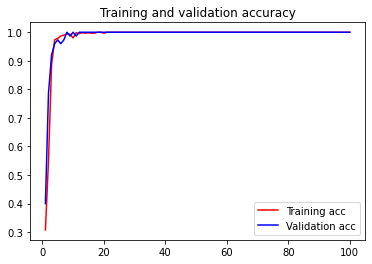

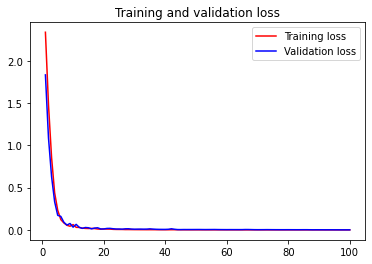

In [18]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
# Save the model as a file
models.save_model(model, model_filename)

In [20]:
# See which are 'stop'
for idx, y in enumerate(y_test):
    if y == 1:
        print(idx)

19
21
40
66
68
71
72
73
74


In [21]:
# TEST: Load model and run it against test set
model = models.load_model(model_filename)
correct = 0
testRange = 50
for i in range(1, testRange):
    maxV = -1
    predict = -1
    counter = 0
    pre = model.predict(np.expand_dims(x_test[i], 0))
    for j in range(12):
        #print(pre[0][j])
        if(pre[0][j] > maxV):
            maxV = pre[0][j]
            predict = counter
        counter = counter + 1
            
    print('Answer:', y_test[i], ' Prediction:', predict, 'Value:', maxV)
    print("Predict Values", pre)
    if y_test[i] == predict:
        correct = correct+1
print()
print("Test Score: ", correct, "/",testRange," = ", correct/testRange) 

1/1 [==============================] - 0s 122ms/step
Answer: 3.0  Prediction: 3 Value: 0.99991965
Predict Values [[4.2248480e-06 2.3220628e-09 6.7307683e-06 9.9991965e-01 5.9771846e-05
  8.2653641e-11 3.2409335e-07 6.5264098e-06 2.4947105e-06 7.5684206e-08
  7.2245655e-08 3.2271497e-09]]
1/1 [==============================] - 0s 20ms/step
Answer: 6.0  Prediction: 6 Value: 0.9976077
Predict Values [[1.6338201e-05 9.9183261e-08 1.5865516e-09 1.8126267e-03 1.7139451e-04
  6.2521991e-07 9.9760771e-01 8.4276842e-05 3.0668930e-04 2.4437924e-08
  2.8674927e-07 1.1101676e-09]]
1/1 [==============================] - 0s 24ms/step
Answer: 6.0  Prediction: 6 Value: 0.99999905
Predict Values [[8.25010886e-08 1.71011996e-10 3.23105800e-13 6.58050281e-10
  3.71099361e-07 1.12899045e-07 9.99999046e-01 1.15712126e-07
  2.16129450e-07 4.14896633e-13 9.48420564e-10 2.78504220e-10]]
1/1 [==============================] - 0s 27ms/step
Answer: 7.0  Prediction: 7 Value: 0.9999963
Predict Values [[2.09213752e

In [22]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.0059 - acc: 1.0000


[0.005863030906766653, 1.0]